In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor

# 전국

# 00. 시간, 지역을 고려하지않은 예측

# Data load

In [3]:
all_Data = pd.read_csv("../excel_data/hepatitisA_data.csv")

In [5]:
del all_Data["date"]

# One Hot Encoding

In [9]:
oneHot_Data = pd.get_dummies(all_Data,prefix="Area_")

In [14]:
patient = oneHot_Data["Patient"]
del oneHot_Data["Patient"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(oneHot_Data,patient, random_state=2000, test_size=0.25)

# Scaling

In [23]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Modeling

#### - Cross val score & Scoring

In [35]:
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1025,
    l2_leaf_reg=0.0125,
    loss_function='RMSE',
    border_count=254,
    logging_level="Info",
    random_state=2000)
result = cross_val_score(model,X_train,y_train,cv=5,scoring="r2")


Population, bin=223 score 21.73859519
Area__Chungcheongbuk-do, bin=0 score 24.14801391
Area__Seoul, bin=0 score 27.62170666
Lowest_temperature, bin=42 score 28.43103016
so2, bin=3 score 29.35460092
o3, bin=29 score 31.10625681
0:	learn: 1.6063410	total: 15.7ms	remaining: 7.82s

Population, bin=225 score 15.80834335
BOD, bin=70 score 19.56608727
o3, bin=26 score 22.74359859
Average_relative_humidity, bin=19 score 23.05933995
highest_temperature, bin=103 score 25.47605286
Area__Chungcheongbuk-do, bin=0 score 28.95122615
1:	learn: 1.4985594	total: 28.2ms	remaining: 7.03s

Population, bin=224 score 16.41595271
Total_phosphorus, bin=105 score 18.43181255
Area__Chungcheongbuk-do, bin=0 score 20.51761125
TOC, bin=42 score 23.91388499
Total_phosphorus, bin=189 score 25.18085736
snowfall, bin=12 score 27.93561346
2:	learn: 1.4080568	total: 38.7ms	remaining: 6.41s

Area__Seoul, bin=0 score 13.83319648
average_wind_speed, bin=53 score 17.68230999
Area__Chungcheongbuk-do, bin=0 score 17.56654597


co, bin=5 score 3.16994483
so2, bin=5 score 2.917686343
Average_relative_humidity, bin=50 score 3.676480659
39:	learn: 0.4317921	total: 361ms	remaining: 4.15s

E_coil, bin=2 score 2.084054183
Average_relative_humidity, bin=161 score 2.258612556
Water_temperature, bin=249 score 2.640584408
Population, bin=226 score 3.146769429
o3, bin=35 score 3.50698022
Average_relative_humidity, bin=64 score 3.878775794
40:	learn: 0.4260957	total: 371ms	remaining: 4.15s

COD, bin=0 score 1.957151933
chlorophyll, bin=204 score 2.121752032
dissolved_oxygen, bin=106 score 2.372268999
E_coil, bin=62 score 2.768060975
monthly_combined_precipitation, bin=67 score 3.507457345
Hydrogen_ion_concentration, bin=45 score 4.560685512
41:	learn: 0.4170182	total: 380ms	remaining: 4.14s

COD, bin=0 score 1.625668569
Lowest_temperature, bin=13 score 2.045004991
COD, bin=9 score 2.189847234
monthly_combined_precipitation, bin=201 score 2.442310438
Total_evaporation, bin=176 score 2.618047262
electrical_conductivity, bi


E_coil, bin=2 score 0.4810506295
Hydrogen_ion_concentration, bin=242 score 0.7034048996
so2, bin=5 score 0.9062204043
Average_relative_humidity, bin=68 score 1.24301032
ammonia_nitrogen, bin=34 score 1.437256861
COD, bin=219 score 1.603078641
80:	learn: 0.2087731	total: 716ms	remaining: 3.71s

Area__Daegu, bin=0 score 0.511746741
Average_relative_humidity, bin=165 score 0.6806731663
suspended_solids, bin=233 score 1.006500424
chlorophyll, bin=209 score 1.277626329
nitric_nitrogen, bin=12 score 1.46289387
Total_nitrogen, bin=80 score 1.598842638
81:	learn: 0.2056471	total: 726ms	remaining: 3.7s

COD, bin=0 score 0.4684141273
Population, bin=229 score 0.6305689474
Month_8, bin=0 score 0.9680037474
nitric_nitrogen, bin=28 score 1.188375028
Average_freight_rate, bin=81 score 1.36844003
BOD, bin=217 score 1.620396015
82:	learn: 0.2029058	total: 738ms	remaining: 3.71s

Area__Gwangju, bin=0 score 0.493448378
TOC, bin=239 score 0.7482623674
so2, bin=5 score 0.9213401739
Total_coliforms, bin=2

116:	learn: 0.1200907	total: 1.06s	remaining: 3.47s

Area__Gwangju, bin=0 score 0.2576866791
Population, bin=55 score 0.4004012546
Total_coliforms, bin=115 score 0.5098601705
Total_coliforms, bin=109 score 0.6614829944
no2, bin=10 score 0.7973585429
chlorophyll, bin=27 score 0.939021905
117:	learn: 0.1184523	total: 1.07s	remaining: 3.47s

dissolved_oxygen, bin=2 score 0.2464334914
COD, bin=0 score 0.340774731
ammonia_nitrogen, bin=11 score 0.4379205872
ammonia_nitrogen, bin=29 score 0.560052551
phosphatase, bin=81 score 0.6571752215
Average_freight_rate, bin=37 score 0.783172848
118:	learn: 0.1172322	total: 1.08s	remaining: 3.46s

Hydrogen_ion_concentration, bin=239 score 0.2433308552
Area__Seoul, bin=0 score 0.3586389426
no2, bin=14 score 0.5259576677
electrical_conductivity, bin=141 score 0.7057787671
Area__Chungcheongbuk-do, bin=0 score 0.8190532761
Total_phosphorus, bin=108 score 0.9599933052
119:	learn: 0.1154778	total: 1.09s	remaining: 3.46s

Total_evaporation, bin=6 score 0.2326

Average_freight_rate, bin=36 score 0.5785816142
156:	learn: 0.0692441	total: 1.42s	remaining: 3.09s

Total_evaporation, bin=3 score 0.1367448595
dissolved_oxygen, bin=3 score 0.1924838497
no2, bin=4 score 0.2461288059
Average_relative_humidity, bin=150 score 0.3186290167
highest_temperature, bin=233 score 0.3874621693
dissolved_oxygen, bin=38 score 0.4599559004
157:	learn: 0.0686789	total: 1.42s	remaining: 3.08s

monthly_combined_precipitation, bin=242 score 0.1543941656
Lowest_temperature, bin=244 score 0.2198894469
Total_coliforms, bin=235 score 0.2697895885
ammonia_nitrogen, bin=114 score 0.3169022843
highest_temperature, bin=59 score 0.3994295214
electrical_conductivity, bin=220 score 0.457906242
158:	learn: 0.0680416	total: 1.43s	remaining: 3.07s

Total_coliforms, bin=40 score 0.1363245208
pm10, bin=33 score 0.2380932776
Total_nitrogen, bin=116 score 0.3289469596
Month_5, bin=0 score 0.4433585735
monthly_combined_precipitation, bin=188 score 0.5289298179
Population, bin=160 score 

200:	learn: 0.0393729	total: 1.77s	remaining: 2.63s

chlorophyll, bin=242 score 0.07251688271
Average_freight_rate, bin=64 score 0.1222157538
electrical_conductivity, bin=218 score 0.1748763519
so2, bin=4 score 0.2266587157
phosphatase, bin=158 score 0.2948214012
monthly_combined_precipitation, bin=90 score 0.3380823298
201:	learn: 0.0387088	total: 1.77s	remaining: 2.62s

no2, bin=10 score 0.0734445737
Hydrogen_ion_concentration, bin=3 score 0.1237329746
Average_relative_humidity, bin=32 score 0.1594243074
Average_freight_rate, bin=45 score 0.197510464
Total_coliforms, bin=153 score 0.2491674297
TOC, bin=184 score 0.3183311783
202:	learn: 0.0382140	total: 1.78s	remaining: 2.61s

Hydrogen_ion_concentration, bin=239 score 0.0842666843
Population, bin=228 score 0.1234434449
Average_freight_rate, bin=20 score 0.1771925419
chlorophyll, bin=201 score 0.2284205623
monthly_combined_precipitation, bin=80 score 0.2671185733
daily_maximum_precipitation, bin=108 score 0.3158997415
203:	learn: 0.03

  tensor 0 is redundant, remove it and stop
243:	learn: 0.0235021	total: 2.12s	remaining: 2.22s

nitric_nitrogen, bin=7 score 0.04321245917
nitric_nitrogen, bin=14 score 0.07959286186
nitric_nitrogen, bin=68 score 0.09602172055
Area__Jeollanam-do, bin=0 score 0.1180891441
monthly_combined_precipitation, bin=218 score 0.143433645
dissolved_nitrogen, bin=51 score 0.1676307639
244:	learn: 0.0232890	total: 2.13s	remaining: 2.21s

monthly_combined_precipitation, bin=240 score 0.04800827977
average_wind_speed, bin=124 score 0.07011146854
o3, bin=40 score 0.09287190357
E_coil, bin=97 score 0.1090602179
Hydrogen_ion_concentration, bin=101 score 0.1412189972
pm10, bin=39 score 0.1702000302
245:	learn: 0.0230738	total: 2.13s	remaining: 2.21s

monthly_combined_precipitation, bin=242 score 0.04532179007
monthly_combined_precipitation, bin=238 score 0.06671187564
Total_nitrogen, bin=117 score 0.08528223055
Total_nitrogen, bin=123 score 0.1154101117
Average_freight_rate, bin=90 score 0.1326781202
el

284:	learn: 0.0142071	total: 2.47s	remaining: 1.86s

Population, bin=82 score 0.02778584859
Total_coliforms, bin=98 score 0.0533182491
Total_phosphorus, bin=80 score 0.07613420867
phosphatase, bin=67 score 0.09741119594
Average_relative_humidity, bin=31 score 0.1143442282
Hydrogen_ion_concentration, bin=157 score 0.1336192884
285:	learn: 0.0139332	total: 2.48s	remaining: 1.85s

nitric_nitrogen, bin=8 score 0.02611536912
nitric_nitrogen, bin=14 score 0.04483319788
highest_temperature, bin=230 score 0.05675495318
Average_freight_rate, bin=80 score 0.07298518764
pm10, bin=13 score 0.08442343622
Average_freight_rate, bin=66 score 0.09642969368
286:	learn: 0.0137973	total: 2.49s	remaining: 1.85s

ammonia_nitrogen, bin=229 score 0.0281122747
ammonia_nitrogen, bin=225 score 0.04304842964
BOD, bin=237 score 0.05373019465
Total_coliforms, bin=202 score 0.06617053724
Average_freight_rate, bin=51 score 0.07932187703
no2, bin=22 score 0.09380356135
287:	learn: 0.0136486	total: 2.5s	remaining: 1.84

pm10, bin=19 score 0.07010427067
330:	learn: 0.0081930	total: 2.83s	remaining: 1.44s

snowfall, bin=52 score 0.0147789805
so2, bin=4 score 0.02438694873
electrical_conductivity, bin=188 score 0.03303058379
o3, bin=29 score 0.04256163859
E_coil, bin=50 score 0.05101822466
Hydrogen_ion_concentration, bin=150 score 0.06224361681
331:	learn: 0.0080650	total: 2.83s	remaining: 1.43s

nitric_nitrogen, bin=49 score 0.01653143304
Average_freight_rate, bin=91 score 0.02831899346
Average_relative_humidity, bin=189 score 0.03740851645
daily_maximum_precipitation, bin=138 score 0.04473471203
Population, bin=209 score 0.05528882291
Water_temperature, bin=168 score 0.06533257057
332:	learn: 0.0079575	total: 2.85s	remaining: 1.43s

monthly_combined_precipitation, bin=242 score 0.01655127514
daily_maximum_precipitation, bin=245 score 0.02359328444
TOC, bin=92 score 0.02930127663
COD, bin=116 score 0.04006019899
Ground_temperature, bin=24 score 0.04902686755
Average_relative_humidity, bin=39 score 0.056

nitric_nitrogen, bin=170 score 0.02404048756
dissolved_phosphorus , bin=82 score 0.0315370246
Total_phosphorus, bin=93 score 0.03712986684
371:	learn: 0.0050589	total: 3.18s	remaining: 1.09s

Total_phosphorus, bin=249 score 0.009260447687
pm10, bin=48 score 0.01339118206
daily_maximum_precipitation, bin=94 score 0.01687982862
Total_phosphorus, bin=30 score 0.02186457206
Average_relative_humidity, bin=115 score 0.02715592303
dissolved_phosphorus , bin=31 score 0.03274586423
372:	learn: 0.0050175	total: 3.19s	remaining: 1.09s

monthly_combined_precipitation, bin=13 score 0.009288290197
Area__Gwangju, bin=0 score 0.01503488872
Population, bin=53 score 0.02131660239
Lowest_temperature, bin=214 score 0.02522909046
BOD, bin=127 score 0.03074648103
Average_relative_humidity, bin=70 score 0.03683851739
373:	learn: 0.0049578	total: 3.2s	remaining: 1.08s

Population, bin=4 score 0.009126711412
snowfall, bin=18 score 0.01544997986
Total_evaporation, bin=15 score 0.02082991533
electrical_conductiv

414:	learn: 0.0029974	total: 3.53s	remaining: 723ms

o3, bin=38 score 0.00585361306
pm10, bin=29 score 0.008259116219
pm10, bin=33 score 0.01179553648
Lowest_temperature, bin=139 score 0.01485403144
BOD, bin=70 score 0.01891824048
Total_phosphorus, bin=37 score 0.02326489084
415:	learn: 0.0029586	total: 3.54s	remaining: 715ms

Average_relative_humidity, bin=163 score 0.00561658511
E_coil, bin=209 score 0.01085264239
Total_phosphorus, bin=130 score 0.01458119951
Population, bin=165 score 0.01868434784
dissolved_oxygen, bin=23 score 0.02316172716
dissolved_nitrogen, bin=159 score 0.02689448854
416:	learn: 0.0029055	total: 3.55s	remaining: 706ms

Total_nitrogen, bin=117 score 0.006010058937
nitric_nitrogen, bin=152 score 0.01054931451
electrical_conductivity, bin=55 score 0.01459912171
BOD, bin=28 score 0.01765841125
average_wind_speed, bin=65 score 0.02101393376
suspended_solids, bin=27 score 0.02520489713
417:	learn: 0.0028637	total: 3.56s	remaining: 697ms

Hydrogen_ion_concentration, b

462:	learn: 0.0016962	total: 3.88s	remaining: 310ms

Hydrogen_ion_concentration, bin=2 score 0.003116912908
suspended_solids, bin=1 score 0.004333642157
Average_freight_rate, bin=80 score 0.005458143933
o3, bin=30 score 0.007185067189
Total_phosphorus, bin=101 score 0.009021317853
E_coil, bin=124 score 0.01167703664
463:	learn: 0.0016793	total: 3.89s	remaining: 302ms

Water_temperature, bin=16 score 0.002950528641
Average_temperature, bin=22 score 0.005708684905
pm10, bin=24 score 0.007358895984
pm10, bin=26 score 0.009179334438
electrical_conductivity, bin=149 score 0.01099618056
Average_relative_humidity, bin=62 score 0.0126328283
464:	learn: 0.0016598	total: 3.9s	remaining: 294ms

Total_evaporation, bin=231 score 0.003237063987
daily_maximum_precipitation, bin=138 score 0.005532302545
dissolved_oxygen, bin=125 score 0.008144088455
nitric_nitrogen, bin=68 score 0.01039330352
Area__Chungcheongbuk-do, bin=0 score 0.01265503562
dissolved_phosphorus , bin=178 score 0.01458187694
465:	lea

Area__Chungcheongbuk-do, bin=0 score 18.91211694
Area__Seoul, bin=0 score 22.73141444
Lowest_temperature, bin=168 score 23.50661439
so2, bin=3 score 24.25803248
o3, bin=29 score 25.91057797
0:	learn: 1.3503075	total: 12.5ms	remaining: 6.26s

Population, bin=225 score 12.64386385
E_coil, bin=113 score 15.62884317
Total_nitrogen, bin=136 score 17.52057678
Area__Chungcheongbuk-do, bin=0 score 19.1454393
dissolved_oxygen, bin=191 score 23.30479924
dissolved_phosphorus , bin=14 score 22.56971184
1:	learn: 1.2672837	total: 21.9ms	remaining: 5.46s

Population, bin=224 score 12.1633403
Area__Chungcheongbuk-do, bin=0 score 13.86938955
E_coil, bin=42 score 19.86262788
TOC, bin=42 score 21.1371831
average_wind_speed, bin=81 score 22.13556932
snowfall, bin=12 score 24.07725406
2:	learn: 1.1810509	total: 30.6ms	remaining: 5.07s

Area__Chungcheongbuk-do, bin=0 score 9.640960438
Population, bin=228 score 16.30923983
electrical_conductivity, bin=211 score 17.93823739
Area__Gangwon, bin=0 score 18.3344

COD, bin=215 score 3.043982456
Average_freight_rate, bin=75 score 3.254939746
phosphatase, bin=87 score 3.499449545
Population, bin=132 score 4.181779863
42:	learn: 0.3659644	total: 360ms	remaining: 3.82s

E_coil, bin=28 score 1.791785269
o3, bin=17 score 1.616684428
no2, bin=6 score 2.31814235
dissolved_phosphorus , bin=68 score 2.555240447
electrical_conductivity, bin=110 score 3.009648922
phosphatase, bin=161 score 3.573778967
43:	learn: 0.3609167	total: 369ms	remaining: 3.83s

Hydrogen_ion_concentration, bin=6 score 1.42407969
Area__Chungcheongbuk-do, bin=0 score 2.201674802
Population, bin=100 score 3.061622977
pm10, bin=28 score 3.485171987
dissolved_nitrogen, bin=121 score 3.980591533
Hydrogen_ion_concentration, bin=133 score 4.101310663
44:	learn: 0.3522197	total: 377ms	remaining: 3.82s

co, bin=6 score 1.421172481
Total_phosphorus, bin=13 score 1.599687303
Population, bin=238 score 2.224630213
suspended_solids, bin=221 score 2.425811246
highest_temperature, bin=210 score 2.702

Month_12, bin=0 score 1.392576848
85:	learn: 0.1870012	total: 708ms	remaining: 3.41s

E_coil, bin=235 score 0.3963294639
Area__Gwangju, bin=0 score 0.6494473145
TOC, bin=235 score 0.8539809321
chlorophyll, bin=206 score 1.035588279
COD, bin=213 score 1.277516758
Average_freight_rate, bin=72 score 1.506239473
86:	learn: 0.1842264	total: 717ms	remaining: 3.4s

Area__Daegu, bin=0 score 0.4357572903
suspended_solids, bin=247 score 0.6032928715
dissolved_phosphorus , bin=218 score 0.7969853346
COD, bin=238 score 0.9725919408
TOC, bin=220 score 1.163063746
suspended_solids, bin=143 score 1.324542602
87:	learn: 0.1824811	total: 726ms	remaining: 3.4s

dissolved_phosphorus , bin=218 score 0.4066450103
suspended_solids, bin=247 score 0.6873150095
Average_freight_rate, bin=88 score 0.8389240837
Ground_temperature, bin=179 score 1.060820909
Population, bin=179 score 1.319870649
nitric_nitrogen, bin=112 score 1.571599672
88:	learn: 0.1792959	total: 737ms	remaining: 3.4s

so2, bin=0 score 0.38717414

Hydrogen_ion_concentration, bin=118 score 0.7465960052
126:	learn: 0.1053564	total: 1.06s	remaining: 3.1s

dissolved_oxygen, bin=61 score 0.2067097829
nitric_nitrogen, bin=22 score 0.3429425624
Total_phosphorus, bin=99 score 0.4966887049
no2, bin=9 score 0.6734542825
electrical_conductivity, bin=50 score 0.8540288892
dissolved_oxygen, bin=88 score 0.9891511186
127:	learn: 0.1032403	total: 1.06s	remaining: 3.1s

Total_phosphorus, bin=248 score 0.2378992722
E_coil, bin=207 score 0.3185724535
chlorophyll, bin=63 score 0.4212918215
ammonia_nitrogen, bin=86 score 0.4957415686
dissolved_nitrogen, bin=120 score 0.664001839
Month_12, bin=0 score 0.8032423897
128:	learn: 0.1018979	total: 1.07s	remaining: 3.09s

Average_relative_humidity, bin=5 score 0.2026198252
Average_relative_humidity, bin=23 score 0.3329856564
Total_coliforms, bin=10 score 0.4477724452
Total_phosphorus, bin=139 score 0.5609642303
pm10, bin=19 score 0.6555259587
Area__Jeollanam-do, bin=0 score 0.777770564
129:	learn: 0.10072


TOC, bin=236 score 0.1259007997
TOC, bin=224 score 0.2007401991
TOC, bin=223 score 0.2626404661
Total_phosphorus, bin=227 score 0.288630184
monthly_combined_precipitation, bin=144 score 0.3250295574
Water_temperature, bin=108 score 0.3863373616
171:	learn: 0.0576608	total: 1.41s	remaining: 2.69s

no2, bin=5 score 0.1195919176
Water_temperature, bin=227 score 0.1849830318
Area__Incheon, bin=0 score 0.2456290243
Population, bin=186 score 0.3205722184
nitric_nitrogen, bin=101 score 0.3803843343
COD, bin=46 score 0.443087106
172:	learn: 0.0569809	total: 1.42s	remaining: 2.68s

COD, bin=235 score 0.1361043227
average_wind_speed, bin=80 score 0.1880553411
o3, bin=34 score 0.2522624913
Average_temperature, bin=179 score 0.3268336559
suspended_solids, bin=215 score 0.4111952242
Total_evaporation, bin=134 score 0.4788345697
173:	learn: 0.0562087	total: 1.43s	remaining: 2.68s

co, bin=6 score 0.1099023414
average_wind_speed, bin=3 score 0.1504598973
average_wind_speed, bin=10 score 0.1927825535

213:	learn: 0.0339708	total: 1.75s	remaining: 2.34s

Hydrogen_ion_concentration, bin=209 score 0.07510657768
Hydrogen_ion_concentration, bin=224 score 0.1192846544
Month_4, bin=0 score 0.1503709928
Total_nitrogen, bin=49 score 0.1947202236
Average_relative_humidity, bin=105 score 0.2278810175
Total_phosphorus, bin=62 score 0.2688377294
214:	learn: 0.0334627	total: 1.76s	remaining: 2.33s

dissolved_oxygen, bin=6 score 0.06715621609
Population, bin=99 score 0.09282511773
Area__Chungcheongbuk-do, bin=0 score 0.1402309401
Hydrogen_ion_concentration, bin=26 score 0.1867265719
monthly_combined_precipitation, bin=61 score 0.2282586188
daily_maximum_precipitation, bin=64 score 0.2613450544
215:	learn: 0.0330130	total: 1.77s	remaining: 2.33s

Population, bin=173 score 0.06303819084
Water_temperature, bin=30 score 0.1073099847
Ground_temperature, bin=25 score 0.1583886725
ammonia_nitrogen, bin=141 score 0.1942003904
dissolved_phosphorus , bin=129 score 0.2446089663
chlorophyll, bin=133 score 0.2

257:	learn: 0.0195557	total: 2.1s	remaining: 1.97s

daily_maximum_precipitation, bin=3 score 0.03813331997
pm10, bin=31 score 0.05204274693
TOC, bin=200 score 0.07765415743
Average_temperature, bin=86 score 0.1024469371
Total_evaporation, bin=125 score 0.131220247
ammonia_nitrogen, bin=127 score 0.1679075846
258:	learn: 0.0193038	total: 2.11s	remaining: 1.97s

no2, bin=5 score 0.04416835239
daily_maximum_precipitation, bin=207 score 0.0720275854
monthly_combined_precipitation, bin=225 score 0.09563476454
Population, bin=76 score 0.1254030948
Hydrogen_ion_concentration, bin=151 score 0.1476131664
dissolved_nitrogen, bin=164 score 0.1730797291
259:	learn: 0.0189852	total: 2.12s	remaining: 1.96s

daily_maximum_precipitation, bin=7 score 0.03991407809
daily_maximum_precipitation, bin=8 score 0.05670963275
Average_temperature, bin=18 score 0.06954900416
Total_coliforms, bin=49 score 0.08464162438
pm10, bin=32 score 0.1040150942
pm10, bin=30 score 0.128015014
260:	learn: 0.0187849	total: 2.1

Hydrogen_ion_concentration, bin=115 score 0.05460862889
suspended_solids, bin=169 score 0.07430711416
302:	learn: 0.0111613	total: 2.46s	remaining: 1.6s

ammonia_nitrogen, bin=217 score 0.0208207936
electrical_conductivity, bin=72 score 0.03643160678
Hydrogen_ion_concentration, bin=155 score 0.05407568664
Area__Daegu, bin=0 score 0.07123100065
Population, bin=132 score 0.08580856784
average_wind_speed, bin=49 score 0.09942366986
303:	learn: 0.0109789	total: 2.46s	remaining: 1.59s

Area__Chungcheongnam-do, bin=0 score 0.01920199582
Hydrogen_ion_concentration, bin=192 score 0.03642447736
Population, bin=222 score 0.04887151893
electrical_conductivity, bin=86 score 0.0618547502
Total_coliforms, bin=69 score 0.07556117994
suspended_solids, bin=95 score 0.09314393425
304:	learn: 0.0108263	total: 2.47s	remaining: 1.58s

o3, bin=1 score 0.01961229121
average_wind_speed, bin=48 score 0.02851966968
dissolved_oxygen, bin=39 score 0.04111362036
monthly_combined_precipitation, bin=248 score 0.0527

Total_evaporation, bin=177 score 0.02217988862
Population, bin=4 score 0.02695206649
dissolved_phosphorus , bin=88 score 0.0322344996
Water_temperature, bin=103 score 0.03927216721
Average_relative_humidity, bin=133 score 0.04710477499
348:	learn: 0.0064088	total: 2.81s	remaining: 1.21s

o3, bin=31 score 0.01125163669
Total_evaporation, bin=165 score 0.02032024803
Ground_temperature, bin=102 score 0.02871848344
Lowest_temperature, bin=149 score 0.03664706874
dissolved_phosphorus , bin=89 score 0.04663004498
suspended_solids, bin=181 score 0.05508626019
349:	learn: 0.0063110	total: 2.81s	remaining: 1.21s

electrical_conductivity, bin=18 score 0.0101577779
highest_temperature, bin=225 score 0.01765031599
nitric_nitrogen, bin=87 score 0.02371807592
highest_temperature, bin=154 score 0.03165967665
Average_temperature, bin=128 score 0.04019454406
no2, bin=15 score 0.04879586948
350:	learn: 0.0062305	total: 2.82s	remaining: 1.2s

monthly_combined_precipitation, bin=247 score 0.01111663243
Av

o3, bin=25 score 0.03370372791
394:	learn: 0.0037659	total: 3.15s	remaining: 838ms

electrical_conductivity, bin=18 score 0.006331641566
pm10, bin=1 score 0.01058733072
Average_freight_rate, bin=28 score 0.01343140926
dissolved_nitrogen, bin=191 score 0.01780486383
BOD, bin=175 score 0.02274894941
chlorophyll, bin=195 score 0.02899800792
395:	learn: 0.0037192	total: 3.16s	remaining: 830ms

Average_relative_humidity, bin=133 score 0.006164711537
ammonia_nitrogen, bin=79 score 0.0122324334
highest_temperature, bin=162 score 0.0191566468
electrical_conductivity, bin=75 score 0.02611525001
no2, bin=8 score 0.03213487104
phosphatase, bin=170 score 0.03794639848
396:	learn: 0.0036397	total: 3.17s	remaining: 822ms

Average_relative_humidity, bin=133 score 0.006893733711
Ground_temperature, bin=80 score 0.01254506261
highest_temperature, bin=134 score 0.01747598376
Average_temperature, bin=129 score 0.02174723602
Total_nitrogen, bin=199 score 0.02607200018
Hydrogen_ion_concentration, bin=87 sc

441:	learn: 0.0021798	total: 3.5s	remaining: 459ms

nitric_nitrogen, bin=63 score 0.003593783558
Average_relative_humidity, bin=71 score 0.006935007723
COD, bin=60 score 0.009304740304
Total_nitrogen, bin=83 score 0.01310121672
E_coil, bin=38 score 0.01676357921
average_wind_speed, bin=16 score 0.01960472758
442:	learn: 0.0021413	total: 3.51s	remaining: 451ms

no2, bin=6 score 0.003746156172
Total_evaporation, bin=183 score 0.007141949176
phosphatase, bin=226 score 0.01077024292
Water_temperature, bin=213 score 0.01342228401
Average_freight_rate, bin=57 score 0.01588019411
phosphatase, bin=103 score 0.01886774165
443:	learn: 0.0021077	total: 3.52s	remaining: 444ms

E_coil, bin=110 score 0.003600369041
Population, bin=4 score 0.007196510103
COD, bin=33 score 0.00886080861
suspended_solids, bin=39 score 0.01154553087
Average_relative_humidity, bin=106 score 0.01471635276
pm10, bin=13 score 0.01702688631
444:	learn: 0.0020826	total: 3.52s	remaining: 436ms

dissolved_phosphorus , bin=249 s

E_coil, bin=110 score 0.004371391684
daily_maximum_precipitation, bin=148 score 0.005851215631
Population, bin=40 score 0.007531878242
monthly_combined_precipitation, bin=175 score 0.009056376808
Total_coliforms, bin=120 score 0.0107991882
486:	learn: 0.0012538	total: 3.85s	remaining: 103ms

Total_coliforms, bin=23 score 0.002415339393
COD, bin=34 score 0.003606667635
Total_coliforms, bin=31 score 0.005139675981
Total_coliforms, bin=35 score 0.006489943782
suspended_solids, bin=38 score 0.007341128582
Average_relative_humidity, bin=58 score 0.008477044019
487:	learn: 0.0012414	total: 3.86s	remaining: 95ms

TOC, bin=1 score 0.002394823672
E_coil, bin=207 score 0.003355487339
E_coil, bin=218 score 0.00491259014
phosphatase, bin=179 score 0.006869971493
average_wind_speed, bin=108 score 0.008692320007
highest_temperature, bin=191 score 0.009952828048
488:	learn: 0.0012251	total: 3.87s	remaining: 87.1ms

Total_evaporation, bin=232 score 0.002057636164
Area__Chungcheongbuk-do, bin=0 score 0

19:	learn: 0.6278828	total: 168ms	remaining: 4.04s

COD, bin=1 score 3.923188237
Total_coliforms, bin=12 score 5.643817781
Population, bin=231 score 5.598679759
Area__Chungcheongbuk-do, bin=0 score 7.3361214
Population, bin=248 score 7.779567866
Area__Chungcheongnam-do, bin=0 score 9.292072848
20:	learn: 0.6014145	total: 177ms	remaining: 4.04s

Population, bin=229 score 3.640929197
Month_3, bin=0 score 4.512439002
COD, bin=6 score 5.002746922
dissolved_phosphorus , bin=176 score 6.160924483
pm10, bin=9 score 6.661131719
Hydrogen_ion_concentration, bin=73 score 6.434482169
21:	learn: 0.5875732	total: 186ms	remaining: 4.05s

E_coil, bin=1 score 3.456388117
COD, bin=1 score 4.429875173
so2, bin=4 score 5.189037698
daily_maximum_precipitation, bin=191 score 5.669701869
Population, bin=51 score 6.240733992
dissolved_phosphorus , bin=169 score 6.867466555
22:	learn: 0.5734314	total: 195ms	remaining: 4.04s

Area__Chungcheongbuk-do, bin=0 score 3.279918469
suspended_solids, bin=22 score 4.8779


Area__Busan, bin=0 score 0.7320962671
E_coil, bin=6 score 0.9801231498
Population, bin=176 score 1.305377494
dissolved_phosphorus , bin=221 score 1.491369409
E_coil, bin=159 score 1.704033973
no2, bin=18 score 2.039996558
65:	learn: 0.2558286	total: 523ms	remaining: 3.44s

Population, bin=232 score 0.8502993375
Population, bin=248 score 1.434556423
Month_9, bin=0 score 1.530250554
electrical_conductivity, bin=59 score 1.728306501
Total_coliforms, bin=116 score 1.901907938
Area__Chungcheongbuk-do, bin=0 score 2.335627296
66:	learn: 0.2508695	total: 532ms	remaining: 3.44s

COD, bin=2 score 0.7177420487
Area__Gangwon, bin=0 score 0.950544392
monthly_combined_precipitation, bin=234 score 1.178925237
Water_temperature, bin=217 score 1.378788784
Hydrogen_ion_concentration, bin=81 score 1.563049218
pm10, bin=20 score 1.789245569
67:	learn: 0.2485305	total: 540ms	remaining: 3.43s

Month_3, bin=0 score 0.8031098842
Area__Daejeon, bin=0 score 1.209112522
Hydrogen_ion_concentration, bin=95 score


Average_freight_rate, bin=3 score 0.2875079397
Total_nitrogen, bin=251 score 0.3922114195
BOD, bin=26 score 0.491558
chlorophyll, bin=71 score 0.7007291515
chlorophyll, bin=30 score 0.8643978469
Area__Chungcheongnam-do, bin=0 score 0.9821865996
109:	learn: 0.1252326	total: 874ms	remaining: 3.1s

Population, bin=232 score 0.2977085636
Population, bin=248 score 0.4649872866
Hydrogen_ion_concentration, bin=246 score 0.5610862109
E_coil, bin=26 score 0.6665277996
Total_phosphorus, bin=23 score 0.7729063627
Average_freight_rate, bin=44 score 0.9124094678
110:	learn: 0.1238397	total: 884ms	remaining: 3.1s

Average_relative_humidity, bin=6 score 0.2668260837
Average_freight_rate, bin=11 score 0.413292176
nitric_nitrogen, bin=156 score 0.5903942673
dissolved_nitrogen, bin=172 score 0.7202433558
Hydrogen_ion_concentration, bin=121 score 0.8672998053
ammonia_nitrogen, bin=110 score 1.022877364
111:	learn: 0.1219388	total: 894ms	remaining: 3.1s

BOD, bin=3 score 0.2723206018
BOD, bin=17 score 0.

BOD, bin=52 score 0.5098842098
Total_coliforms, bin=24 score 0.6064698051
highest_temperature, bin=50 score 0.6938344671
151:	learn: 0.0707927	total: 1.22s	remaining: 2.79s

Area__Daegu, bin=0 score 0.1340941552
dissolved_nitrogen, bin=7 score 0.2140226832
Total_evaporation, bin=207 score 0.2829867556
Ground_temperature, bin=195 score 0.3642441579
Hydrogen_ion_concentration, bin=92 score 0.4428869912
Total_nitrogen, bin=123 score 0.5468623948
152:	learn: 0.0699472	total: 1.23s	remaining: 2.78s

COD, bin=4 score 0.145125388
ammonia_nitrogen, bin=15 score 0.2006526343
ammonia_nitrogen, bin=32 score 0.2609701099
COD, bin=68 score 0.4170497184
o3, bin=17 score 0.4799462718
Hydrogen_ion_concentration, bin=75 score 0.5537627883
153:	learn: 0.0690235	total: 1.24s	remaining: 2.78s

Total_coliforms, bin=218 score 0.1364007987
Total_coliforms, bin=207 score 0.2124926159
electrical_conductivity, bin=97 score 0.3245193986
Total_nitrogen, bin=23 score 0.4053172349
Hydrogen_ion_concentration, bin=91

197:	learn: 0.0380476	total: 1.56s	remaining: 2.39s

average_wind_speed, bin=0 score 0.06912350892
co, bin=6 score 0.09551930776
Total_phosphorus, bin=100 score 0.1148907109
E_coil, bin=160 score 0.1599082179
phosphatase, bin=122 score 0.2011995931
nitric_nitrogen, bin=73 score 0.270702629
198:	learn: 0.0375715	total: 1.57s	remaining: 2.38s

no2, bin=5 score 0.07288384408
Population, bin=42 score 0.131480123
TOC, bin=165 score 0.1809762551
Average_temperature, bin=188 score 0.2405663121
Average_relative_humidity, bin=153 score 0.2791278973
daily_maximum_precipitation, bin=239 score 0.3164368488
199:	learn: 0.0369192	total: 1.58s	remaining: 2.37s

daily_maximum_precipitation, bin=2 score 0.06835938231
monthly_combined_precipitation, bin=14 score 0.1066443217
phosphatase, bin=14 score 0.1407046004
dissolved_phosphorus , bin=17 score 0.1800658335
E_coil, bin=98 score 0.2176312314
TOC, bin=34 score 0.2551622209
200:	learn: 0.0365438	total: 1.59s	remaining: 2.37s

Total_coliforms, bin=216 s

239:	learn: 0.0218575	total: 1.91s	remaining: 2.07s

nitric_nitrogen, bin=41 score 0.04149811659
suspended_solids, bin=218 score 0.08033372551
Total_phosphorus, bin=182 score 0.1086561793
nitric_nitrogen, bin=77 score 0.1383820282
highest_temperature, bin=185 score 0.1639681894
chlorophyll, bin=171 score 0.1895250829
240:	learn: 0.0215239	total: 1.92s	remaining: 2.06s

Total_evaporation, bin=249 score 0.05133835874
Total_evaporation, bin=246 score 0.06842580469
daily_maximum_precipitation, bin=121 score 0.08228823829
daily_maximum_precipitation, bin=116 score 0.113328535
pm10, bin=36 score 0.1350056817
Hydrogen_ion_concentration, bin=216 score 0.1496514291
241:	learn: 0.0212984	total: 1.93s	remaining: 2.06s

Water_temperature, bin=5 score 0.03812640265
Lowest_temperature, bin=19 score 0.05614262547
Ground_temperature, bin=34 score 0.0795888564
dissolved_phosphorus , bin=6 score 0.1034141317
Total_coliforms, bin=172 score 0.118427472
electrical_conductivity, bin=142 score 0.13752954
242

Hydrogen_ion_concentration, bin=54 score 0.0926426079
285:	learn: 0.0124815	total: 2.26s	remaining: 1.69s

Total_phosphorus, bin=249 score 0.02332268528
Total_nitrogen, bin=251 score 0.03121508423
dissolved_nitrogen, bin=248 score 0.03963035538
monthly_combined_precipitation, bin=49 score 0.04492621954
daily_maximum_precipitation, bin=27 score 0.05517220595
dissolved_phosphorus , bin=4 score 0.06380141185
286:	learn: 0.0124103	total: 2.27s	remaining: 1.69s

no2, bin=28 score 0.02336712087
Water_temperature, bin=9 score 0.03282120144
Water_temperature, bin=11 score 0.04378181621
Average_temperature, bin=7 score 0.05162499694
dissolved_phosphorus , bin=13 score 0.05721557112
Population, bin=147 score 0.06541354012
287:	learn: 0.0123460	total: 2.28s	remaining: 1.68s

Average_relative_humidity, bin=49 score 0.02209947306
suspended_solids, bin=116 score 0.04244892384
dissolved_oxygen, bin=42 score 0.05807266642
pm10, bin=9 score 0.07630332355
Average_relative_humidity, bin=110 score 0.09286

electrical_conductivity, bin=175 score 0.04672756999
o3, bin=8 score 0.05649906563
331:	learn: 0.0069283	total: 2.62s	remaining: 1.32s

o3, bin=1 score 0.01279939588
COD, bin=220 score 0.01774613918
chlorophyll, bin=170 score 0.02447176534
chlorophyll, bin=150 score 0.03213570171
average_wind_speed, bin=110 score 0.04275398353
Total_evaporation, bin=166 score 0.05191671342
332:	learn: 0.0068494	total: 2.62s	remaining: 1.31s

average_wind_speed, bin=0 score 0.01238779655
dissolved_oxygen, bin=1 score 0.01738845119
BOD, bin=13 score 0.02188131567
electrical_conductivity, bin=13 score 0.02832263107
Population, bin=153 score 0.03472988323
Average_freight_rate, bin=38 score 0.04089306152
333:	learn: 0.0068073	total: 2.63s	remaining: 1.31s

Hydrogen_ion_concentration, bin=204 score 0.01397374418
Month_4, bin=0 score 0.02162762524
Average_temperature, bin=123 score 0.03252693425
Total_phosphorus, bin=26 score 0.03969713029
BOD, bin=109 score 0.04779317714
Population, bin=97 score 0.0568013796

BOD, bin=41 score 0.01665713001
TOC, bin=70 score 0.02212771891
monthly_combined_precipitation, bin=57 score 0.02630235911
Total_evaporation, bin=80 score 0.03252804167
376:	learn: 0.0041531	total: 2.96s	remaining: 967ms

co, bin=3 score 0.007683034699
Average_temperature, bin=124 score 0.01302879075
pm10, bin=33 score 0.01851121219
Average_relative_humidity, bin=123 score 0.0248545808
suspended_solids, bin=101 score 0.03085593817
Lowest_temperature, bin=106 score 0.03662393301
377:	learn: 0.0040855	total: 2.97s	remaining: 959ms

Total_coliforms, bin=218 score 0.007546208143
Total_coliforms, bin=222 score 0.01307348616
ammonia_nitrogen, bin=173 score 0.01635330168
Population, bin=222 score 0.02056841671
Hydrogen_ion_concentration, bin=69 score 0.02587124634
ammonia_nitrogen, bin=128 score 0.03111332852
378:	learn: 0.0040494	total: 2.98s	remaining: 952ms

Total_coliforms, bin=218 score 0.008458664485
Total_coliforms, bin=230 score 0.01385883164
E_coil, bin=192 score 0.01819060748
COD, b


pm10, bin=1 score 0.004804326045
Population, bin=5 score 0.006530916923
monthly_combined_precipitation, bin=80 score 0.008754619484
monthly_combined_precipitation, bin=72 score 0.01105137574
Lowest_temperature, bin=178 score 0.01268832465
Lowest_temperature, bin=199 score 0.01487029753
423:	learn: 0.0023138	total: 3.31s	remaining: 594ms

phosphatase, bin=112 score 0.00415090885
E_coil, bin=158 score 0.008194922221
dissolved_phosphorus , bin=131 score 0.01273684776
Total_nitrogen, bin=71 score 0.01568277548
nitric_nitrogen, bin=71 score 0.01879842639
chlorophyll, bin=154 score 0.02250983272
424:	learn: 0.0022675	total: 3.32s	remaining: 586ms

snowfall, bin=65 score 0.004080502208
snowfall, bin=46 score 0.005635836298
monthly_combined_precipitation, bin=21 score 0.007876498948
co, bin=4 score 0.01130542713
Average_freight_rate, bin=22 score 0.0144393893
o3, bin=7 score 0.01697517484
425:	learn: 0.0022427	total: 3.33s	remaining: 579ms

TOC, bin=3 score 0.003992895662
Population, bin=222 

467:	learn: 0.0013743	total: 3.66s	remaining: 250ms

suspended_solids, bin=249 score 0.002585142467
suspended_solids, bin=248 score 0.003802625007
TOC, bin=227 score 0.004631921582
Total_coliforms, bin=247 score 0.005492884364
BOD, bin=243 score 0.006508581227
TOC, bin=223 score 0.007084902055
468:	learn: 0.0013662	total: 3.67s	remaining: 242ms

Population, bin=5 score 0.002638964223
co, bin=5 score 0.003836628184
Population, bin=7 score 0.004900053631
average_wind_speed, bin=61 score 0.005447675082
average_wind_speed, bin=68 score 0.006572502011
Hydrogen_ion_concentration, bin=168 score 0.007568980543
469:	learn: 0.0013574	total: 3.67s	remaining: 235ms

Total_coliforms, bin=218 score 0.002513623755
Total_coliforms, bin=207 score 0.004180599449
average_wind_speed, bin=64 score 0.005544767551
Average_relative_humidity, bin=58 score 0.007131616244
no2, bin=16 score 0.008726219831
electrical_conductivity, bin=93 score 0.01063412467
470:	learn: 0.0013416	total: 3.68s	remaining: 227ms

susp

Area__Chungcheongbuk-do, bin=0 score 14.66839326
COD, bin=60 score 18.32634289
chlorophyll, bin=121 score 19.46549789
COD, bin=99 score 20.54896165
Population, bin=52 score 20.39132474
4:	learn: 1.2093453	total: 49.9ms	remaining: 4.94s

E_coil, bin=7 score 11.09263526
Area__Chungcheongbuk-do, bin=0 score 13.02301656
average_wind_speed, bin=126 score 15.46869758
Area__Seoul, bin=0 score 16.82637756
COD, bin=13 score 17.85264246
co, bin=2 score 18.77708323
5:	learn: 1.1546952	total: 60.3ms	remaining: 4.96s

Population, bin=223 score 10.62326031
daily_maximum_precipitation, bin=164 score 11.7866295
chlorophyll, bin=1 score 16.32814762
dissolved_nitrogen, bin=209 score 17.10822191
monthly_combined_precipitation, bin=87 score 17.05176871
snowfall, bin=69 score 17.90707002
6:	learn: 1.1065390	total: 68.9ms	remaining: 4.85s

Population, bin=229 score 9.118548706
Area__Chungcheongbuk-do, bin=0 score 11.74247912
co, bin=2 score 14.37386998
o3, bin=11 score 15.40954117
COD, bin=55 score 15.64806


co, bin=6 score 1.510392587
electrical_conductivity, bin=209 score 1.801648203
nitric_nitrogen, bin=13 score 2.10586686
snowfall, bin=6 score 2.332908774
highest_temperature, bin=210 score 2.542970098
o3, bin=23 score 2.790520316
45:	learn: 0.3688000	total: 403ms	remaining: 3.97s

Population, bin=222 score 1.387984761
Total_evaporation, bin=237 score 2.077035452
Average_freight_rate, bin=80 score 2.275573971
highest_temperature, bin=205 score 2.642471777
o3, bin=40 score 3.32064917
so2, bin=4 score 3.558133834
46:	learn: 0.3623390	total: 412ms	remaining: 3.97s

Population, bin=44 score 1.332845974
o3, bin=38 score 1.965035396
nitric_nitrogen, bin=171 score 2.280279081
E_coil, bin=66 score 2.56888458
chlorophyll, bin=109 score 3.00334969
ammonia_nitrogen, bin=107 score 3.601965742
47:	learn: 0.3563632	total: 420ms	remaining: 3.96s

Area__Chungcheongnam-do, bin=0 score 1.363780124
Lowest_temperature, bin=41 score 2.107664659
Population, bin=221 score 2.19135938
COD, bin=107 score 2.6545

88:	learn: 0.1898700	total: 749ms	remaining: 3.46s

Area__Gwangju, bin=0 score 0.4171341313
E_coil, bin=207 score 0.6806987009
ammonia_nitrogen, bin=30 score 1.018827207
Hydrogen_ion_concentration, bin=11 score 1.235167717
Total_evaporation, bin=81 score 1.442182142
chlorophyll, bin=62 score 1.662402072
89:	learn: 0.1870527	total: 757ms	remaining: 3.45s

so2, bin=5 score 0.4213193801
Total_phosphorus, bin=250 score 0.634220994
Total_phosphorus, bin=196 score 0.7448837166
suspended_solids, bin=6 score 0.9416713402
Total_coliforms, bin=70 score 1.110118061
Total_phosphorus, bin=17 score 1.320809997
90:	learn: 0.1850270	total: 766ms	remaining: 3.44s

Area__Daejeon, bin=0 score 0.4816288325
chlorophyll, bin=209 score 0.7351014609
Area__Gwangju, bin=0 score 0.9948056727
suspended_solids, bin=170 score 1.162022978
E_coil, bin=99 score 1.397608596
COD, bin=153 score 1.605905293
91:	learn: 0.1823237	total: 774ms	remaining: 3.43s

Population, bin=229 score 0.3827915511
electrical_conductivity, 

so2, bin=3 score 0.7798314851
130:	learn: 0.0992981	total: 1.1s	remaining: 3.1s

Population, bin=49 score 0.2131156824
Month_3, bin=0 score 0.3556735647
Hydrogen_ion_concentration, bin=68 score 0.5262382591
daily_maximum_precipitation, bin=98 score 0.6395141626
Average_relative_humidity, bin=50 score 0.7998587872
Average_freight_rate, bin=44 score 0.9316052063
131:	learn: 0.0975173	total: 1.11s	remaining: 3.09s

pm10, bin=1 score 0.212533581
dissolved_phosphorus , bin=210 score 0.3018512853
Water_temperature, bin=219 score 0.4140911937
Average_relative_humidity, bin=143 score 0.5350064569
dissolved_oxygen, bin=29 score 0.6688818428
Total_phosphorus, bin=164 score 0.7809146744
132:	learn: 0.0961737	total: 1.12s	remaining: 3.09s

average_wind_speed, bin=59 score 0.1910909464
ammonia_nitrogen, bin=12 score 0.3469089942
Population, bin=49 score 0.4424306686
ammonia_nitrogen, bin=28 score 0.5616804208
Total_evaporation, bin=169 score 0.6601783114
o3, bin=24 score 0.7738159355
133:	learn: 0.

Ground_temperature, bin=33 score 0.4218765613
176:	learn: 0.0532213	total: 1.46s	remaining: 2.65s

Total_evaporation, bin=250 score 0.1072974953
Area__Daejeon, bin=0 score 0.1539779471
E_coil, bin=96 score 0.2052602364
pm10, bin=6 score 0.2690837392
Area__Chungcheongnam-do, bin=0 score 0.3320472005
average_wind_speed, bin=79 score 0.3923796913
177:	learn: 0.0525873	total: 1.46s	remaining: 2.65s

Average_relative_humidity, bin=143 score 0.1003884545
Hydrogen_ion_concentration, bin=229 score 0.1818331421
E_coil, bin=83 score 0.257486158
daily_maximum_precipitation, bin=156 score 0.3169821963
monthly_combined_precipitation, bin=109 score 0.3960454662
electrical_conductivity, bin=158 score 0.4714484262
178:	learn: 0.0517511	total: 1.47s	remaining: 2.64s

highest_temperature, bin=49 score 0.1030102085
Ground_temperature, bin=37 score 0.1925931826
snowfall, bin=5 score 0.2491878034
Total_evaporation, bin=40 score 0.3101162372
monthly_combined_precipitation, bin=57 score 0.3747148945
Average_

electrical_conductivity, bin=120 score 0.162744788
Water_temperature, bin=72 score 0.193648584
monthly_combined_precipitation, bin=132 score 0.2307841061
Water_temperature, bin=90 score 0.2666895665
221:	learn: 0.0303327	total: 1.81s	remaining: 2.27s

daily_maximum_precipitation, bin=249 score 0.06698705941
highest_temperature, bin=160 score 0.09058725362
Total_nitrogen, bin=34 score 0.1395910165
chlorophyll, bin=175 score 0.174827584
Area__Chungcheongbuk-do, bin=0 score 0.2096028588
TOC, bin=174 score 0.2530069553
222:	learn: 0.0298684	total: 1.82s	remaining: 2.26s

Total_evaporation, bin=250 score 0.05454214959
nitric_nitrogen, bin=41 score 0.08301141733
nitric_nitrogen, bin=55 score 0.1334170878
monthly_combined_precipitation, bin=201 score 0.1682483568
highest_temperature, bin=159 score 0.1990084731
dissolved_nitrogen, bin=72 score 0.2316496295
223:	learn: 0.0295339	total: 1.83s	remaining: 2.25s

daily_maximum_precipitation, bin=252 score 0.05302371523
Area__Daejeon, bin=0 score 0.

monthly_combined_precipitation, bin=187 score 0.1130864419
Average_relative_humidity, bin=126 score 0.13912078
dissolved_oxygen, bin=29 score 0.1634551923
266:	learn: 0.0163986	total: 2.16s	remaining: 1.89s

COD, bin=218 score 0.02974266099
TOC, bin=177 score 0.04956299639
pm10, bin=28 score 0.0683227767
dissolved_oxygen, bin=55 score 0.09419941678
dissolved_nitrogen, bin=72 score 0.1128802129
suspended_solids, bin=205 score 0.137117181
267:	learn: 0.0161699	total: 2.17s	remaining: 1.88s

so2, bin=0 score 0.03015755618
E_coil, bin=96 score 0.04396998527
highest_temperature, bin=48 score 0.06132108649
Lowest_temperature, bin=45 score 0.09769063135
Lowest_temperature, bin=71 score 0.1152052705
so2, bin=2 score 0.134634388
268:	learn: 0.0159328	total: 2.18s	remaining: 1.87s

o3, bin=7 score 0.03179039983
electrical_conductivity, bin=61 score 0.06038655767
Hydrogen_ion_concentration, bin=146 score 0.08012731507
average_wind_speed, bin=21 score 0.1007586545
monthly_combined_precipitation, b

Average_relative_humidity, bin=22 score 0.02996970934
Average_relative_humidity, bin=36 score 0.03804496806
dissolved_oxygen, bin=243 score 0.04649844566
Total_evaporation, bin=73 score 0.05436192435
312:	learn: 0.0094348	total: 2.52s	remaining: 1.5s

Hydrogen_ion_concentration, bin=5 score 0.01715193594
Hydrogen_ion_concentration, bin=10 score 0.02877664394
Hydrogen_ion_concentration, bin=22 score 0.03686066236
dissolved_nitrogen, bin=20 score 0.04534385867
TOC, bin=197 score 0.05227090865
suspended_solids, bin=235 score 0.06013567848
313:	learn: 0.0093538	total: 2.53s	remaining: 1.5s

so2, bin=6 score 0.0168702085
phosphatase, bin=250 score 0.02351647727
COD, bin=175 score 0.02837548092
TOC, bin=182 score 0.03921477136
chlorophyll, bin=176 score 0.05030024096
electrical_conductivity, bin=155 score 0.06213745139
314:	learn: 0.0092740	total: 2.54s	remaining: 1.49s

so2, bin=6 score 0.01623408865
monthly_combined_precipitation, bin=6 score 0.02292475499
highest_temperature, bin=5 score 


nitric_nitrogen, bin=11 score 0.0104973818
dissolved_nitrogen, bin=30 score 0.01700548956
daily_maximum_precipitation, bin=241 score 0.02572405546
Total_coliforms, bin=89 score 0.02910120771
dissolved_oxygen, bin=41 score 0.03536065278
suspended_solids, bin=184 score 0.04072345355
359:	learn: 0.0053615	total: 2.87s	remaining: 1.12s

Average_relative_humidity, bin=8 score 0.01012127034
Average_relative_humidity, bin=22 score 0.01648020865
ammonia_nitrogen, bin=47 score 0.02111442823
chlorophyll, bin=117 score 0.02581501453
o3, bin=16 score 0.03380023917
COD, bin=55 score 0.04185898318
360:	learn: 0.0052907	total: 2.88s	remaining: 1.11s

COD, bin=240 score 0.01134566659
COD, bin=251 score 0.01714672812
COD, bin=220 score 0.0192989294
chlorophyll, bin=221 score 0.02368354191
Total_evaporation, bin=172 score 0.02704811855
Average_freight_rate, bin=23 score 0.03145471871
361:	learn: 0.0052576	total: 2.89s	remaining: 1.1s

Hydrogen_ion_concentration, bin=5 score 0.009070498263
Hydrogen_ion_


E_coil, bin=96 score 0.005304200418
Hydrogen_ion_concentration, bin=175 score 0.009254303718
pm10, bin=36 score 0.01538288981
so2, bin=4 score 0.02007404879
Ground_temperature, bin=129 score 0.02350315038
monthly_combined_precipitation, bin=107 score 0.02836593309
407:	learn: 0.0029607	total: 3.23s	remaining: 727ms

monthly_combined_precipitation, bin=21 score 0.006218087322
Population, bin=53 score 0.009735494741
Lowest_temperature, bin=142 score 0.01280445147
Average_temperature, bin=144 score 0.01630136567
daily_maximum_precipitation, bin=157 score 0.02022562927
Total_evaporation, bin=188 score 0.02508973654
408:	learn: 0.0029075	total: 3.23s	remaining: 720ms

Total_evaporation, bin=118 score 0.005191585601
Ground_temperature, bin=118 score 0.008913069078
Water_temperature, bin=117 score 0.01403032453
suspended_solids, bin=192 score 0.01837592648
E_coil, bin=196 score 0.02220912499
ammonia_nitrogen, bin=159 score 0.02652020899
409:	learn: 0.0028520	total: 3.24s	remaining: 712ms

so

451:	learn: 0.0016915	total: 3.57s	remaining: 380ms

daily_maximum_precipitation, bin=2 score 0.003282471345
average_wind_speed, bin=59 score 0.004471956298
Total_coliforms, bin=89 score 0.006339051639
dissolved_oxygen, bin=41 score 0.008393246711
Population, bin=113 score 0.01122622579
suspended_solids, bin=210 score 0.01356123815
452:	learn: 0.0016713	total: 3.58s	remaining: 372ms

average_wind_speed, bin=10 score 0.003032795275
Month_10, bin=0 score 0.00455060512
Average_temperature, bin=124 score 0.007112541685
Total_phosphorus, bin=26 score 0.008614938604
Hydrogen_ion_concentration, bin=169 score 0.01050620613
Total_nitrogen, bin=85 score 0.01293124705
453:	learn: 0.0016521	total: 3.59s	remaining: 364ms

daily_maximum_precipitation, bin=17 score 0.003413782249
ammonia_nitrogen, bin=140 score 0.006001857716
chlorophyll, bin=117 score 0.007616767216
daily_maximum_precipitation, bin=80 score 0.009982881384
dissolved_nitrogen, bin=186 score 0.01238130787
Hydrogen_ion_concentration, bi

496:	learn: 0.0010193	total: 3.93s	remaining: 23.7ms

Water_temperature, bin=197 score 0.001640178199
Average_relative_humidity, bin=110 score 0.003031744367
Average_relative_humidity, bin=135 score 0.00495133274
pm10, bin=34 score 0.006302246781
E_coil, bin=85 score 0.007363838735
BOD, bin=85 score 0.008774205714
497:	learn: 0.0010050	total: 3.94s	remaining: 15.8ms

Total_coliforms, bin=233 score 0.001730060337
daily_maximum_precipitation, bin=236 score 0.003073493207
suspended_solids, bin=122 score 0.004225929707
COD, bin=59 score 0.005122121222
TOC, bin=85 score 0.006037199312
dissolved_phosphorus , bin=48 score 0.006978853747
498:	learn: 0.0009947	total: 3.94s	remaining: 7.91ms

Lowest_temperature, bin=237 score 0.001594933165
daily_maximum_precipitation, bin=252 score 0.002592034286
no2, bin=16 score 0.003233639409
Water_temperature, bin=179 score 0.004187960257
Lowest_temperature, bin=178 score 0.005273434593
daily_maximum_precipitation, bin=209 score 0.006189578519
499:	learn: 0

30:	learn: 0.5129074	total: 253ms	remaining: 3.83s

Area__Chungcheongbuk-do, bin=0 score 2.449270668
TOC, bin=99 score 4.095360276
TOC, bin=133 score 4.366829857
dissolved_oxygen, bin=240 score 5.623056251
Population, bin=240 score 5.233299882
E_coil, bin=52 score 5.976528083
31:	learn: 0.5004720	total: 261ms	remaining: 3.82s

Hydrogen_ion_concentration, bin=0 score 2.730129233
Lowest_temperature, bin=37 score 3.03364416
chlorophyll, bin=220 score 3.418147811
Total_evaporation, bin=38 score 3.803691522
electrical_conductivity, bin=121 score 4.078799168
Hydrogen_ion_concentration, bin=69 score 5.454524617
32:	learn: 0.4909776	total: 271ms	remaining: 3.83s

Area__Daegu, bin=0 score 2.141949983
Population, bin=229 score 2.608945729
monthly_combined_precipitation, bin=128 score 3.381898658
E_coil, bin=80 score 4.288303415
pm10, bin=20 score 4.966959443
Average_relative_humidity, bin=102 score 5.858753982
33:	learn: 0.4770377	total: 278ms	remaining: 3.81s

COD, bin=1 score 1.933680408
Area_

73:	learn: 0.2499497	total: 601ms	remaining: 3.46s

Population, bin=250 score 0.6597642626
Population, bin=227 score 0.925998912
BOD, bin=210 score 1.341671241
TOC, bin=163 score 1.635985375
BOD, bin=192 score 1.880952842
COD, bin=218 score 2.080482664
74:	learn: 0.2458600	total: 610ms	remaining: 3.46s

Month_11, bin=0 score 0.6025049728
Total_phosphorus, bin=180 score 0.9581449127
TOC, bin=166 score 1.256978649
Lowest_temperature, bin=33 score 1.470532981
daily_maximum_precipitation, bin=96 score 1.811380016
Hydrogen_ion_concentration, bin=41 score 2.1849041
75:	learn: 0.2419354	total: 619ms	remaining: 3.45s

co, bin=5 score 0.6438120711
BOD, bin=36 score 0.906483547
Average_freight_rate, bin=75 score 1.227746998
Average_relative_humidity, bin=181 score 1.545087874
COD, bin=163 score 1.675206846
average_wind_speed, bin=125 score 1.884599191
76:	learn: 0.2385517	total: 628ms	remaining: 3.45s

nitric_nitrogen, bin=6 score 0.5798741201
nitric_nitrogen, bin=16 score 0.9349342924
electrica

115:	learn: 0.1266723	total: 951ms	remaining: 3.15s

Hydrogen_ion_concentration, bin=241 score 0.2704757722
Total_coliforms, bin=72 score 0.4431857726
Population, bin=227 score 0.5741726221
electrical_conductivity, bin=156 score 0.735163413
electrical_conductivity, bin=195 score 0.9254421052
monthly_combined_precipitation, bin=139 score 1.07816212
116:	learn: 0.1244636	total: 960ms	remaining: 3.14s

Area__Daegu, bin=0 score 0.2523918278
E_coil, bin=102 score 0.3502731157
Water_temperature, bin=31 score 0.5033037339
dissolved_oxygen, bin=206 score 0.68638775
Total_coliforms, bin=48 score 0.8482914667
chlorophyll, bin=113 score 1.010838896
117:	learn: 0.1226990	total: 969ms	remaining: 3.14s

chlorophyll, bin=194 score 0.253721826
electrical_conductivity, bin=216 score 0.4472339576
chlorophyll, bin=236 score 0.628451295
Hydrogen_ion_concentration, bin=245 score 0.7621197601
ammonia_nitrogen, bin=123 score 0.8754001613
Hydrogen_ion_concentration, bin=62 score 1.042936843
118:	learn: 0.1209

Water_temperature, bin=31 score 0.2141186106
highest_temperature, bin=44 score 0.2978876226
dissolved_nitrogen, bin=164 score 0.3877395352
Population, bin=79 score 0.4646389048
Average_relative_humidity, bin=69 score 0.5492607128
162:	learn: 0.0612378	total: 1.3s	remaining: 2.7s

Water_temperature, bin=22 score 0.1150133075
pm10, bin=31 score 0.1990298109
pm10, bin=26 score 0.2652401284
snowfall, bin=28 score 0.338503067
chlorophyll, bin=193 score 0.4045028178
COD, bin=194 score 0.4772155154
163:	learn: 0.0604454	total: 1.31s	remaining: 2.69s

suspended_solids, bin=1 score 0.1258425323
ammonia_nitrogen, bin=230 score 0.1712467883
ammonia_nitrogen, bin=219 score 0.2335367511
Population, bin=57 score 0.2965063678
Water_temperature, bin=30 score 0.344779416
dissolved_oxygen, bin=223 score 0.4115515387
164:	learn: 0.0599249	total: 1.32s	remaining: 2.68s

TOC, bin=3 score 0.1250472116
Area__Incheon, bin=0 score 0.174021236
suspended_solids, bin=208 score 0.2696689012
phosphatase, bin=247 sc

monthly_combined_precipitation, bin=181 score 0.2776797229
209:	learn: 0.0313168	total: 1.65s	remaining: 2.28s

phosphatase, bin=247 score 0.0579786307
Hydrogen_ion_concentration, bin=2 score 0.08752458208
Total_nitrogen, bin=208 score 0.1084907096
electrical_conductivity, bin=17 score 0.1359896444
suspended_solids, bin=7 score 0.1769931398
daily_maximum_precipitation, bin=201 score 0.1999683731
210:	learn: 0.0309922	total: 1.66s	remaining: 2.27s

pm10, bin=1 score 0.05489018391
Total_evaporation, bin=159 score 0.07757284999
Total_evaporation, bin=147 score 0.1199567763
Average_relative_humidity, bin=183 score 0.1597181565
no2, bin=15 score 0.1845512128
Water_temperature, bin=100 score 0.2145834312
211:	learn: 0.0307147	total: 1.67s	remaining: 2.27s

nitric_nitrogen, bin=6 score 0.0593311336
nitric_nitrogen, bin=27 score 0.08660959842
electrical_conductivity, bin=178 score 0.1191670718
Area__Seoul, bin=0 score 0.1560890794
Average_freight_rate, bin=35 score 0.1872391476
dissolved_nitro

highest_temperature, bin=67 score 0.08327184496
dissolved_oxygen, bin=236 score 0.1011243158
no2, bin=16 score 0.1169076533
dissolved_phosphorus , bin=146 score 0.1342353303
257:	learn: 0.0164521	total: 2s	remaining: 1.88s

Average_relative_humidity, bin=5 score 0.03242158762
Total_nitrogen, bin=228 score 0.05065373424
monthly_combined_precipitation, bin=195 score 0.06475072678
Hydrogen_ion_concentration, bin=126 score 0.08251915544
Average_freight_rate, bin=24 score 0.1023510997
monthly_combined_precipitation, bin=16 score 0.1282483802
258:	learn: 0.0162552	total: 2.01s	remaining: 1.87s

Average_relative_humidity, bin=5 score 0.03008656841
Hydrogen_ion_concentration, bin=241 score 0.04746465098
dissolved_nitrogen, bin=71 score 0.05974592711
Population, bin=183 score 0.09101107692
Total_nitrogen, bin=64 score 0.109122292
pm10, bin=27 score 0.1274553999
259:	learn: 0.0160420	total: 2.02s	remaining: 1.86s

Average_relative_humidity, bin=200 score 0.02888526389
chlorophyll, bin=241 score 


Average_relative_humidity, bin=133 score 0.01824900921
Average_relative_humidity, bin=120 score 0.03015406107
Average_temperature, bin=205 score 0.03999339614
Total_phosphorus, bin=179 score 0.05412667033
highest_temperature, bin=211 score 0.0653031828
Population, bin=68 score 0.07407138705
304:	learn: 0.0092143	total: 2.35s	remaining: 1.5s

no2, bin=5 score 0.01802923066
TOC, bin=160 score 0.03415468054
daily_maximum_precipitation, bin=240 score 0.04577825013
nitric_nitrogen, bin=204 score 0.05428833753
monthly_combined_precipitation, bin=223 score 0.06428915931
Population, bin=135 score 0.0759926221
305:	learn: 0.0090893	total: 2.36s	remaining: 1.5s

chlorophyll, bin=250 score 0.01699147582
o3, bin=1 score 0.02314127168
Water_temperature, bin=8 score 0.0291913618
dissolved_oxygen, bin=248 score 0.03585337765
Total_nitrogen, bin=170 score 0.04093693589
nitric_nitrogen, bin=173 score 0.04738396365
306:	learn: 0.0090368	total: 2.37s	remaining: 1.49s

monthly_combined_precipitation, bin

350:	learn: 0.0057046	total: 2.69s	remaining: 1.14s

Total_coliforms, bin=51 score 0.009673872981
o3, bin=2 score 0.01666730759
pm10, bin=38 score 0.02377625295
Total_coliforms, bin=122 score 0.02957323626
suspended_solids, bin=100 score 0.03650936917
monthly_combined_precipitation, bin=147 score 0.04397534204
351:	learn: 0.0056480	total: 2.7s	remaining: 1.14s

dissolved_nitrogen, bin=250 score 0.01070986725
no2, bin=2 score 0.0152647339
Lowest_temperature, bin=248 score 0.01934702371
chlorophyll, bin=188 score 0.02224806943
Total_phosphorus, bin=205 score 0.02676150349
suspended_solids, bin=195 score 0.0337981561
352:	learn: 0.0056076	total: 2.71s	remaining: 1.13s

daily_maximum_precipitation, bin=97 score 0.01121956637
daily_maximum_precipitation, bin=102 score 0.02189574594
Total_evaporation, bin=224 score 0.0286452892
Hydrogen_ion_concentration, bin=76 score 0.03306120299
o3, bin=30 score 0.03856182072
Average_temperature, bin=161 score 0.04432808178
353:	learn: 0.0055322	total: 2.


pm10, bin=35 score 0.006588801127
BOD, bin=36 score 0.01131360444
Average_freight_rate, bin=19 score 0.01557285967
pm10, bin=33 score 0.01947152956
Total_coliforms, bin=54 score 0.02273537755
o3, bin=15 score 0.02647818607
396:	learn: 0.0033640	total: 3.05s	remaining: 791ms

daily_maximum_precipitation, bin=247 score 0.007030544724
monthly_combined_precipitation, bin=225 score 0.009348314838
Water_temperature, bin=188 score 0.01331803944
E_coil, bin=11 score 0.01593994573
chlorophyll, bin=20 score 0.01910443408
pm10, bin=23 score 0.02212567826
397:	learn: 0.0033369	total: 3.06s	remaining: 783ms

monthly_combined_precipitation, bin=163 score 0.006548861527
monthly_combined_precipitation, bin=160 score 0.01246884001
daily_maximum_precipitation, bin=121 score 0.01544789322
Hydrogen_ion_concentration, bin=24 score 0.01901006154
Total_evaporation, bin=187 score 0.02270643605
chlorophyll, bin=153 score 0.0264345413
398:	learn: 0.0032928	total: 3.06s	remaining: 776ms

pm10, bin=0 score 0.005

441:	learn: 0.0020092	total: 3.39s	remaining: 445ms

Population, bin=243 score 0.00387803988
Population, bin=236 score 0.005755744685
daily_maximum_precipitation, bin=97 score 0.007887859993
monthly_combined_precipitation, bin=99 score 0.01030399926
average_wind_speed, bin=109 score 0.0122269581
Population, bin=76 score 0.014572249
442:	learn: 0.0019876	total: 3.4s	remaining: 437ms

dissolved_oxygen, bin=222 score 0.003994554393
monthly_combined_precipitation, bin=18 score 0.006110270434
co, bin=4 score 0.008529208142
Total_phosphorus, bin=64 score 0.01146629399
Average_relative_humidity, bin=54 score 0.01414444617
Hydrogen_ion_concentration, bin=151 score 0.01641875442
443:	learn: 0.0019573	total: 3.41s	remaining: 430ms

o3, bin=3 score 0.003783894201
no2, bin=21 score 0.006273755341
Hydrogen_ion_concentration, bin=170 score 0.007816442159
ammonia_nitrogen, bin=165 score 0.01025757974
ammonia_nitrogen, bin=161 score 0.01245481971
daily_maximum_precipitation, bin=163 score 0.0137850367

o3, bin=6 score 0.004556332765
chlorophyll, bin=143 score 0.005658984902
Average_freight_rate, bin=42 score 0.007364942053
nitric_nitrogen, bin=144 score 0.00874583839
phosphatase, bin=102 score 0.01067157139
485:	learn: 0.0012648	total: 3.74s	remaining: 108ms

TOC, bin=5 score 0.002512126553
dissolved_phosphorus , bin=235 score 0.003306804294
Total_phosphorus, bin=222 score 0.004559576432
ammonia_nitrogen, bin=237 score 0.005709634046
Population, bin=130 score 0.006750009605
Area__Jeollanam-do, bin=0 score 0.008145694206
486:	learn: 0.0012571	total: 3.75s	remaining: 100ms

Total_nitrogen, bin=69 score 0.002691210786
Water_temperature, bin=102 score 0.005373309138
TOC, bin=93 score 0.00663756008
TOC, bin=86 score 0.008459604462
BOD, bin=63 score 0.00965669398
ammonia_nitrogen, bin=79 score 0.01108195168
487:	learn: 0.0012357	total: 3.76s	remaining: 92.4ms

Average_relative_humidity, bin=197 score 0.002312372586
COD, bin=193 score 0.003168023668
suspended_solids, bin=224 score 0.0047995

In [36]:
"""교차검증 R2 score"""
result.mean()

0.6797513050787609

In [41]:
model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.0225,
    l2_leaf_reg=50,
    loss_function='RMSE',
    border_count=254,
    logging_level="Silent",
    random_state=2000).fit(X_train,y_train)
pred = model.predict(X_test)
print("tr score : ",model.score(X_train,y_train))
print("te score : ",model.score(X_test,y_test))
print("RMSE",mean_squared_error(y_test,pred)**0.5)

tr score :  0.9732883118538492
te score :  0.7238882958503609
RMSE 0.7556041364314743


##### 시간 및 지역을 고려하지 않았을 때 정확도가 내려가는 것을 볼 수 있음.

# 01.시간 및 지역을 고려한 예측

In [99]:
all_Data = pd.read_csv("../excel_data/hepatitisA_data.csv")

In [100]:
del all_Data["date"]
past = all_Data.iloc[:-17,:]
future = all_Data.iloc[-17:,:]

y_tr = past["Patient"]
y_te = future["Patient"]

In [106]:
area = all_Data["Area"].unique()

In [115]:
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

In [126]:
act_list,pred_list = [],[]
for ar in tqdm_notebook(area):
    Area_tr = past.loc[past["Area"]==ar,:]
    tr_target = Area_tr["Patient"]
    Area_te = future.loc[future["Area"]==ar,:]
    te_target = Area_te["Patient"]

    Area_tr = Area_tr.loc[:,"Hydrogen_ion_concentration":]
    Area_te = Area_te.loc[:,"Hydrogen_ion_concentration":]

    model = CatBoostRegressor(
        iterations=2000,
        learning_rate=0.1025,
        l2_leaf_reg=0.0125,
        loss_function='RMSE',
        border_count=254,
        logging_level="Silent",
        random_state=26).fit(Area_tr,tr_target)
    
    prediction = model.predict(Area_te)
    act_list.append(te_target.values[0])
    pred_list.append(prediction)
    print("Area >> ",ar)
    print("- Actual : ",te_target.values[0])
    print("- Prediction : ",prediction[0])
    #print("MAE >> ",mean_absolute_error(te_target,prediction))
    print("RMSE >> ",mean_squared_error(te_target,prediction)**0.5)
    print("-"*50)

Area >>  Gangwon
- Actual :  0.09216001900000001
- Prediction :  0.06746418911895602
RMSE >>  0.02469582988104399
--------------------------------------------------
Area >>  Gyeonggi
- Actual :  2.1502545580000003
- Prediction :  2.7271568177801373
RMSE >>  0.576902259780137
--------------------------------------------------
Area >>  Gyeongsangnam-do
- Actual :  0.299764235
- Prediction :  1.136935037077445
RMSE >>  0.8371708020774449
--------------------------------------------------
Area >>  Gyeongsangbuk-do
- Actual :  0.43553248200000005
- Prediction :  0.5089756949996339
RMSE >>  0.07344321299963386
--------------------------------------------------
Area >>  Gwangju
- Actual :  0.27409726100000004
- Prediction :  0.4772227279094481
RMSE >>  0.20312546690944805
--------------------------------------------------
Area >>  Daegu
- Actual :  0.08891555
- Prediction :  0.16668677664320994
RMSE >>  0.07777122664320994
--------------------------------------------------
Area >>  Daejeon
- 

- 지역별로 0~4의 10만명 당 발생자 수 오차가 확인됨.
    - 충청도의 경우 당시 오염된 조개젓으로 인해 이상치가 발생하여 예측이 불가능 하였음
        - 관련 뉴스 : http://www.ichannela.com/news/main/news_detailPage.do?publishId=000000166098

# 실제치 & 예측치

In [129]:
print(act_list)
print("")
print(pred_list)

[0.09216001900000001, 2.1502545580000003, 0.299764235, 0.43553248200000005, 0.27409726100000004, 0.08891555, 0.487454347, 0.030587697, 2.916298349, 0.312646162, 0.06711697700000001, 0.448291282, 0.053107590999999996, 0.30460543100000004, 0.094060901, 1.124934343, 0.318343595]

[array([0.06746419]), array([2.72715682]), array([1.13693504]), array([0.50897569]), array([0.47722273]), array([0.16668678]), array([0.69623496]), array([0.0476724]), array([3.89308013]), array([0.21416042]), array([0.15730386]), array([0.86487395]), array([0.45528956]), array([0.62654394]), array([0.0803423]), array([1.81223436]), array([4.36424819])]


# 시각화

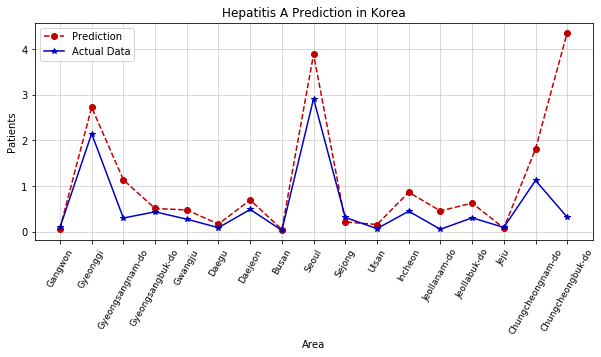

In [165]:
plt.figure(figsize=(10,4))
plt.title("Hepatitis A Prediction in Korea")
plt.plot(pred_list,color="#C00000",ls='--',marker='o', label="Prediction")
plt.plot(act_list,color="#0000C0",ls='-',marker='*', label="Actual Data")
plt.grid(color="#D0D0D0")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],labels=area,fontsize=9,rotation=60)
plt.xlabel("Area")
plt.ylabel("Patients")
plt.legend()
plt.show()

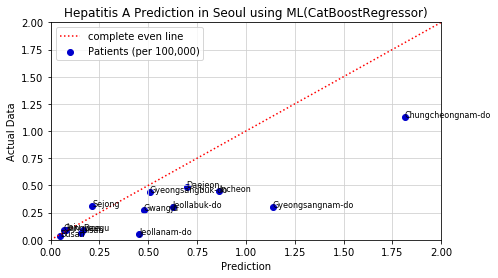

In [164]:
plt.figure(figsize=(7,4))
plt.title("Hepatitis A Prediction in Seoul using ML(CatBoostRegressor)")
plt.scatter(pred_list,act_list,label="Patients (per 100,000)",color="#0000CC")
plt.plot([0,1,2],[0,1,2],color="red",ls=":",label="complete even line")
plt.grid(color="#D0D0D0")
plt.xlabel("Prediction")
plt.ylabel("Actual Data")
for i in range(17):
    if(pred_list[i]<2):
        plt.text(pred_list[i],act_list[i],area[i],fontsize=8)
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()
plt.show()

# Map 시각화

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import operator
plt.xkcd()

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
korea=gpd.read_file('전국시각화.json')
korea['name']=korea['name'].replace(['제주특별자치도','세종특별자치시','울산광역시','대전광역시','광주광역시','인천광역시',\
                                     '대구광역시','부산광역시','서울특별시',],\
                      ['Jeju','Sejong','Ulsan','Daejeon','Gwangju',\
                                     'Incheon','Daegu','Busan','Seoul'])

korea['name']=korea['name'].replace(['경상남도','경상북도','전라남도','전라북도','충청남도','충청북도',\
                                     '강원도','경기도'],\
                      ['Gyeongsangnam-do','Gyeongsangbuk-do','Jeollanam-do',\
                       'Jeollabuk-do','Chungcheongnam-do',\
                                     'Chungcheongbuk-do','Gangwon-do','Gyeonggi-do'])

In [ ]:
"""실제값"""
pat_list = []
for i in act_list :
    pat_list.append(round(i,2))
a1,a2 = pat_list[0],pat_list[1] #강원경기
b1,b2 = pat_list[2],pat_list[3] #경남경북
c1,c2 = pat_list[4],pat_list[5] #광주대구
d1,d2 = pat_list[6],pat_list[7] #대전부산
e1,e2 = pat_list[8],pat_list[9] #서울울산
f1,f2 = pat_list[10],pat_list[11] #인천전남
g1,g2 = pat_list[12],pat_list[13]#전북제주
h1,h2 = pat_list[14],pat_list[15]#충남충북

where = {
    'Jeju':g2,'Gyeongsangnam-do':b1,'Gyeongsangbuk-do':b2,'Jeollanam-do':f2,
    'Jeollabuk-do':g1,'Chungcheongnam-do':h1,'Chungcheongbuk-do':h2,'Gangwon-do':a1,
    'Gyeonggi-do':a2,'Sejong':h2,'Ulsan':e2,'Daejeon':d1,
    'Gwangju':c1,'Incheon':f1,'Daegu':c2,'Busan':d2,'Seoul':e1}


where_df = pd.DataFrame(list(where.items()), columns = ["name", 'percent'])
data_result=pd.merge(korea,where_df,on='name')
data_result["sum"] = data_result["name"].map(str) +' \n '+ data_result["percent"].map(str)

final_pic=data_result.plot( figsize=(11,7),linewidth=0.15, edgecolor='navy',
                           column='percent',cmap='Reds',legend=False,)

for index,row in data_result.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    
    if row['name'] == 'Gyeonggi-do':
        xytext[0]=tuple(map(operator.add, xytext[0], (0,-0.3)))
    elif row['name'] == 'Incheon':
        xytext[0]=tuple(map(operator.add, xytext[0], (0.1,0.1)))
    elif row['name'] == 'Chungcheongnam-do':
        xytext[0]=tuple(map(operator.add, xytext[0], (-0.2,0.2)))
#     elif row['name'] == '대전시':
#         xytext[0]=tuple(map(operator.add, xytext[0], (0,-0.1)))
    plt.annotate(row['sum'],xy=xy[0], xytext=xytext[0],
                 horizontalalignment='center',verticalalignment='center')
    plt.axis('off')
plt.show()

korea_fig=final_pic.get_figure()
korea_fig.savefig('korea_map_Actual.png',transparent=True)

In [ ]:
"""예측값"""
pat_list = []
for i in pred_list :
    pat_list.append(round(i,2))
a1,a2 = pat_list[0],pat_list[1] #강원경기
b1,b2 = pat_list[2],pat_list[3] #경남경북
c1,c2 = pat_list[4],pat_list[5] #광주대구
d1,d2 = pat_list[6],pat_list[7] #대전부산
e1,e2 = pat_list[8],pat_list[9] #서울울산
f1,f2 = pat_list[10],pat_list[11] #인천전남
g1,g2 = pat_list[12],pat_list[13]#전북제주
h1,h2 = pat_list[14],pat_list[15]#충남충북

where = {
    'Jeju':g2,'Gyeongsangnam-do':b1,'Gyeongsangbuk-do':b2,'Jeollanam-do':f2,
    'Jeollabuk-do':g1,'Chungcheongnam-do':h1,'Chungcheongbuk-do':h2,'Gangwon-do':a1,
    'Gyeonggi-do':a2,'Sejong':h2,'Ulsan':e2,'Daejeon':d1,
    'Gwangju':c1,'Incheon':f1,'Daegu':c2,'Busan':d2,'Seoul':e1}


where_df = pd.DataFrame(list(where.items()), columns = ["name", 'percent'])
data_result=pd.merge(korea,where_df,on='name')
data_result["sum"] = data_result["name"].map(str) +' \n '+ data_result["percent"].map(str)

final_pic=data_result.plot( figsize=(11,7),linewidth=0.15, edgecolor='navy',
                           column='percent',cmap='Reds',legend=False,)

for index,row in data_result.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    
    if row['name'] == 'Gyeonggi-do':
        xytext[0]=tuple(map(operator.add, xytext[0], (0,-0.3)))
    elif row['name'] == 'Incheon':
        xytext[0]=tuple(map(operator.add, xytext[0], (0.1,0.1)))
    elif row['name'] == 'Chungcheongnam-do':
        xytext[0]=tuple(map(operator.add, xytext[0], (-0.2,0.2)))
#     elif row['name'] == '대전시':
#         xytext[0]=tuple(map(operator.add, xytext[0], (0,-0.1)))
    plt.annotate(row['sum'],xy=xy[0], xytext=xytext[0],
                 horizontalalignment='center',verticalalignment='center')
    plt.axis('off')
plt.show()

korea_fig=final_pic.get_figure()
korea_fig.savefig('korea_map_prediction.png',transparent=True)